In [ ]:
from graphxai.datasets import ShapeGGen
import matplotlib.pyplot as plt

100%|██████████| 45/45 [00:00<00:00, 136.47it/s]


Jumlah node: 126
Jumlah edge: 362
Jumlah kelas: 2


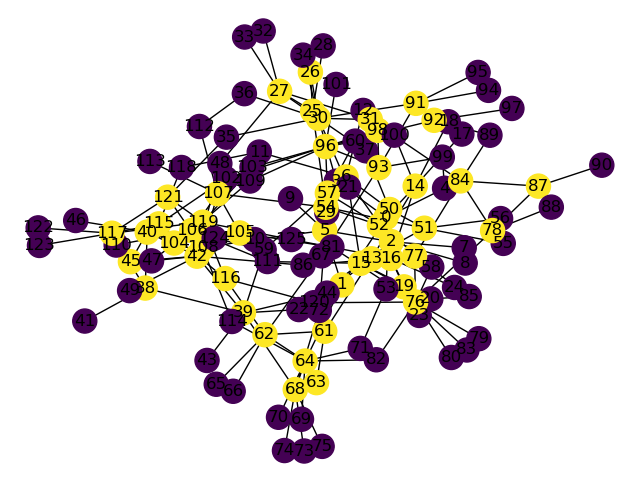

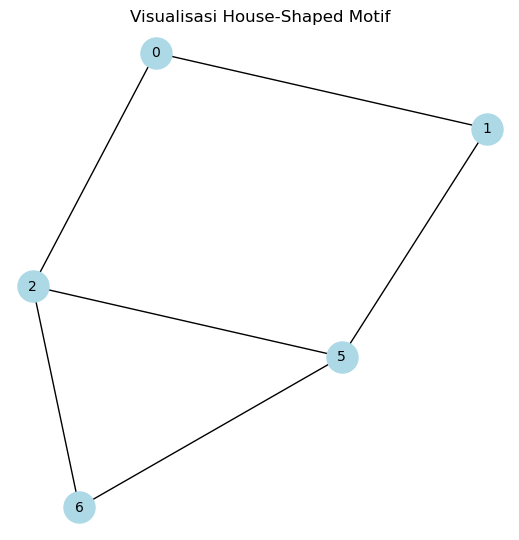

House-shaped motif ditemukan dengan node: [0, 2, 5, 1, 6]


In [11]:
# Membuat dataset dengan motif house-shaped - SG-Base
dataset = ShapeGGen(S='house', Ns=1200, p=0.006, ns=11, K=2, 
                    nf=11, ni=4, sf=0.6, cf=2, φ=0.5, η=1, L=3)

# Menampilkan informasi dataset
print(f"Jumlah node: {dataset.graph.x.shape[0]}")
print(f"Jumlah edge: {dataset.graph.edge_index.shape[1]}")
print(f"Jumlah kelas: {dataset.graph.y.max().item() + 1}")

# Visualisasi dataset
fig, ax = plt.subplots(figsize=(8, 6))
dataset.visualize(shape_label=True, ax=ax, show=True)

import networkx as nx
from networkx.algorithms.isomorphism import GraphMatcher

# Definisi house-shaped motif
house_motif = nx.Graph()
house_motif.add_edges_from([(0,1), (1,2), (2,3), (3,0), (1,4), (2,4)]) # Struktur motif rumah

def find_house_motif_fast(G):
    """
    Mencari house-shaped motif dengan Graph Matching untuk meningkatkan kecepatan.
    Args:
        G (networkx.Graph): Graf NetworkX yang akan dianalisis.
    Returns:
        int: Jumlah house-shaped motif yang ditemukan.
    """
    matcher = GraphMatcher(G, house_motif)
    motifs = list(matcher.subgraph_isomorphisms_iter())

    if len(motifs) == 0:
        print("House-shaped motif tidak ditemukan dalam graf.")
        return

    # Ambil satu motif pertama yang ditemukan
    selected_motif_nodes = list(motifs[0].keys())
    subG = G.subgraph(selected_motif_nodes)

    # Visualisasi motif di dalam graf
    plt.figure(figsize=(5, 5))
    pos = nx.spring_layout(subG, seed=42)  # Posisi node untuk visualisasi
    nx.draw(subG, pos, with_labels=True, node_color='lightblue', edge_color='black', node_size=500, font_size=10)
    plt.title("Visualisasi House-Shaped Motif")
    plt.show()

    print(f"House-shaped motif ditemukan dengan node: {selected_motif_nodes}")

# Konversi ShapeGGen ke NetworkX
G_nx = nx.Graph()
edge_list = dataset.graph.edge_index.numpy().T  # Konversi edge_index dari tensor ke numpy
G_nx.add_edges_from(edge_list)

# Jalankan pencarian dan visualisasi house motif
find_house_motif_fast(G_nx)

100%|██████████| 45/45 [00:00<00:00, 116.83it/s]


Jumlah node: 120
Jumlah edge: 350
Jumlah kelas: 2


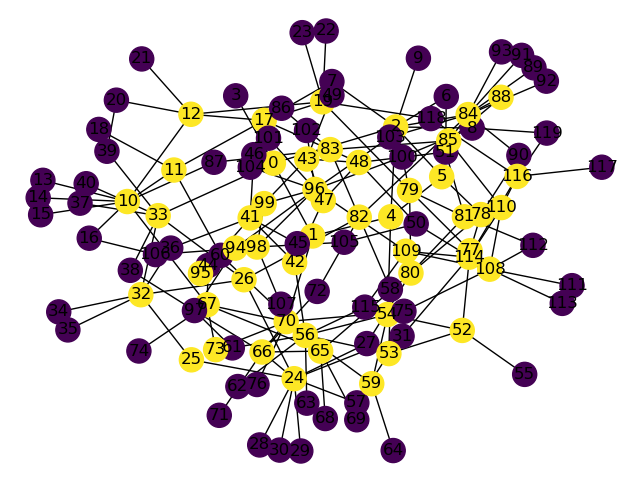

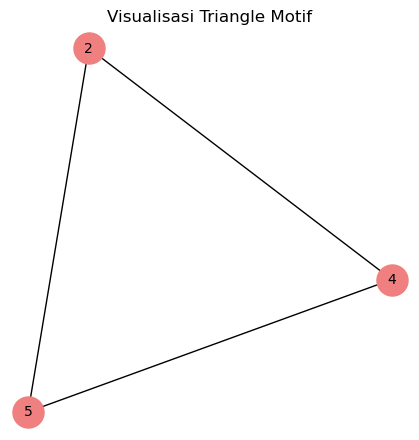

Triangle motif ditemukan dengan node: [2, 4, 5]


[2, 4, 5]

In [13]:
# Membuat dataset dengan motif house-shaped - SG-SmallEx
dataset = ShapeGGen(S='triangle', Ns=1200, p=0.006, ns=12, K=2, 
                    nf=11, ni=4, sf=0.5, cf=2, φ=0.5, η=1, L=3)

# Menampilkan informasi dataset
print(f"Jumlah node: {dataset.graph.x.shape[0]}")
print(f"Jumlah edge: {dataset.graph.edge_index.shape[1]}")
print(f"Jumlah kelas: {dataset.graph.y.max().item() + 1}")

# Visualisasi dataset
fig, ax = plt.subplots(figsize=(8, 6))
dataset.visualize(shape_label=True, ax=ax, show=True)

import networkx as nx
import matplotlib.pyplot as plt

# Fungsi mencari dan menampilkan satu triangle motif
def find_and_visualize_triangle_motif(G):
    """
    Mencari dan memvisualisasikan satu triangle motif dalam graf.
    Args:
        G (networkx.Graph): Graf NetworkX yang akan dianalisis.
    """
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        for i in range(len(neighbors)):
            for j in range(i + 1, len(neighbors)):
                if G.has_edge(neighbors[i], neighbors[j]):
                    # Jika ada hubungan antar dua tetangga, maka terbentuk triangle motif
                    triangle_nodes = [node, neighbors[i], neighbors[j]]
                    subG = G.subgraph(triangle_nodes)

                    # Visualisasi motif triangle
                    plt.figure(figsize=(4, 4))
                    pos = nx.spring_layout(subG, seed=42)  # Posisi node untuk visualisasi
                    nx.draw(subG, pos, with_labels=True, node_color='lightcoral', edge_color='black', node_size=500, font_size=10)
                    plt.title("Visualisasi Triangle Motif")
                    plt.show()

                    print(f"Triangle motif ditemukan dengan node: {triangle_nodes}")
                    return triangle_nodes  # Hanya menampilkan satu triangle motif pertama yang ditemukan

    print("Triangle motif tidak ditemukan dalam graf.")
    return None

# Konversi ShapeGGen ke NetworkX
G_nx = nx.Graph()
edge_list = dataset.graph.edge_index.numpy().T  # Konversi edge_index dari tensor ke numpy
G_nx.add_edges_from(edge_list)

# Jalankan pencarian dan visualisasi triangle motif
find_and_visualize_triangle_motif(G_nx)